In [1]:
using Random
using LinearAlgebra

function euclidean_norm(vec::Vector)
    return sqrt(sum(vec.^2))
end

function generate_matrix(l::Int, r::Int, n::Int)    
    return rand(n, n) .* (r - l) .+ l
end

function increase_diag_elems(a::Matrix, diagcoef::Float64)
    n = size(a, 1)
    for i in 1:n
        for j in 1:n
            if j != i
                a[i,i] += diagcoef * abs(a[i, j])
            end
        end
    end
    
    return a
end


function diag_dominance(matrix::Matrix)
    a=copy(matrix)
    res = -100000
    for i in 1:size(a,1)
        sum = 0
        for j in 1:size(a,1)
            if i!=j
                sum+=abs(a[i,j])
            end
        end
        
        res = max(res,abs(a[i,i])-sum)
    end

    return res
end

function diag_dominance2(matrix::Matrix)
    a=copy(matrix)
    return maximum(abs(a[i, i]) - sum(abs(a[i, j]) for j in 1:size(a, 2) if j != i) for i in 1:size(a, 1))
end

                        

function test(method::Function, A::Matrix, x::Vector)
    x_calc = method(A, A*x)
    return euclidean_norm(x - x_calc)
end

m = generate_matrix(0,10,3)
println(m)
increase_diag_elems(m,2.0)
println(m)

[8.332408103591206 9.391557954501838 7.603095650086885; 5.210586212467053 9.66378998020028 5.94957976455518; 9.120533073856906 1.9997302870558764 4.802475949723189]
[42.32171531276865 9.391557954501838 7.603095650086885; 5.210586212467053 31.984121934244744 5.94957976455518; 9.120533073856906 1.9997302870558764 27.043002671548756]


In [2]:
function gaussian_elimination(matrix::Matrix, vector::Vector)
    n = length(vector)

    A = copy(matrix)
    b = copy(vector)
    
    # Прямой ход
    for k in 1:n-1
        for i in k+1:n
            factor = A[i, k] / A[k, k]
            A[i, :] -= factor * A[k, :]
            b[i] -= factor * b[k]
        end
    end

    # Обратный ход
    x = zeros(n)
    x[n] = b[n] / A[n, n]
    for i in n-1:-1:1
        x[i] = (b[i] - dot(A[i, i+1:end], x[i+1:end])) / A[i, i]
    end
    
    return x
end

A = [2.0 1.0 -1.0; -3.0 -1.0 2.0; -2.0 1.0 2.0]
b = [8.0; -11.0; -3.0]

x = gaussian_elimination(A, b)

println("Решение:")
println(x)

Решение:
[2.0, 3.0, -1.0]


In [3]:
function gaussian_elimination_pivot(matrix::Matrix, vector::Vector)
    n = length(vector)

    A = copy(matrix)
    b = copy(vector)
    
    # Прямой ход
    for k in 1:n-1
        # Выбор главного элемента по строкам
        maxindex = argmax(abs.(A[k:n, k])) + k - 1
        if maxindex != k
            A[[k, maxindex], k:end] = A[[maxindex, k], k:end]
            b[k], b[maxindex] = b[maxindex], b[k]
        end
        
        for i in k+1:n
            factor = A[i, k] / A[k, k]
            A[i, k+1:end] -= factor * A[k, k+1:end]
            b[i] -= factor * b[k]
        end
    end

    # Обратный ход
    x = zeros(n)
    x[n] = b[n] / A[n, n]
    for i in n-1:-1:1
        x[i] = (b[i] - dot(A[i, i+1:end], x[i+1:end])) / A[i, i]
    end
    
    return x
end

# Пример использования
A = [2.0 1.0 -1.0; -3.0 -1.0 2.0; -2.0 1.0 2.0]
b = [8.0; -11.0; -3.0]

x = gaussian_elimination_pivot(A, b)

println("Решение:")
println(x)

Решение:
[2.0, 3.0000000000000004, -0.9999999999999999]


In [4]:
function gaussian_elimination_pivot_row(matrix::Matrix, vector::Vector)
    n = length(vector)

    A = copy(matrix)
    b = copy(vector)
    
    # Прямой ход
    for k in 1:n-1
        # Выбор главного элемента по столбцу
        maxindex = argmax(abs.(A[k, k:end])) + k - 1
        if maxindex != k
            A[[k, maxindex], :] = A[[maxindex, k], :]
            b[k], b[maxindex] = b[maxindex], b[k]
        end
        
        for i in k+1:n
            factor = A[i, k] / A[k, k]
            A[i, k+1:end] -= factor * A[k, k+1:end]
            b[i] -= factor * b[k]
        end
    end

    # Обратный ход
    x = zeros(n)
    x[n] = b[n] / A[n, n]
    for i in n-1:-1:1
        x[i] = (b[i] - dot(A[i, i+1:end], x[i+1:end])) / A[i, i]
    end
    
    return x
end

A = [2.0 1.0 -1.0; -3.0 -1.0 2.0; -2.0 1.0 2.0]
b = [8.0; -11.0; -3.0]

x = gaussian_elimination_pivot_row(A, b)

println("Решение:")
println(x)

Решение:
[2.0, 3.0, -1.0]


In [5]:
function gauss_with_rows_and_columns_permutation(matrix::Matrix, vector::Vector)
    n = length(vector)

    A = copy(matrix)
    b = copy(vector)
    x_i = collect(1:n)
    x = zeros(Float64, n)

    # Прямой ход
    for i in 1:n-1
        max_index_col = argmax(abs.(A[i:end, i])) + i - 1
        max_index_row = argmax(abs.(A[i, i:end])) + i - 1
        if abs(A[max_index_col, i]) > abs(A[i, max_index_row])
            A[[i, max_index_col], i:end] = A[[max_index_col, i], i:end]
            b[i], b[max_index_col] = b[max_index_col], b[i]
        else
            A[[i, max_index_row], :] = A[[max_index_row, i], :]
            b[i], b[max_index_row] = b[max_index_row], b[i]
        end

        for j in i+1:n
            f = A[j, i] / A[i, i]
            A[j, :] -= f * A[i, :]
            b[j] -= f * b[i]
        end
    end

    # Обратный ход
    for i in n:-1:1
        x[i] = b[i] / A[i, i]
        for j in i-1:-1:1
            b[j] -= A[j, i] * x[i]
        end
    end

    x_copy = copy(x)
    for i in 1:n
        x[x_i[i]] = x_copy[i]
    end

    return x
end

A = [2.0 1.0 -1.0; -3.0 -1.0 2.0; -2.0 1.0 2.0]
b = [8.0; -11.0; -3.0]

x = gauss_with_rows_and_columns_permutation(A, b)

println("Решение:")

Решение:


[-1.0, -0.7000000000000001, -0.4, -0.1, 0.2, 0.5, 0.8]


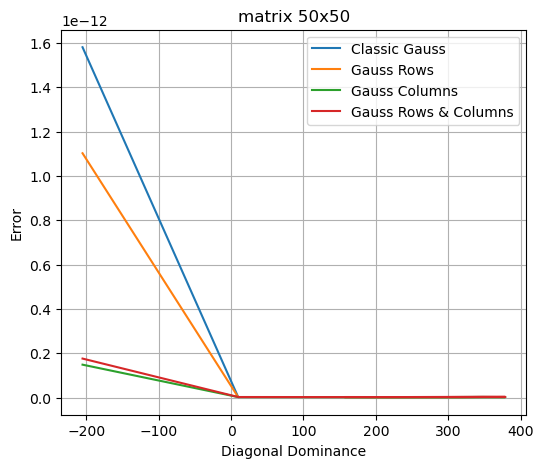

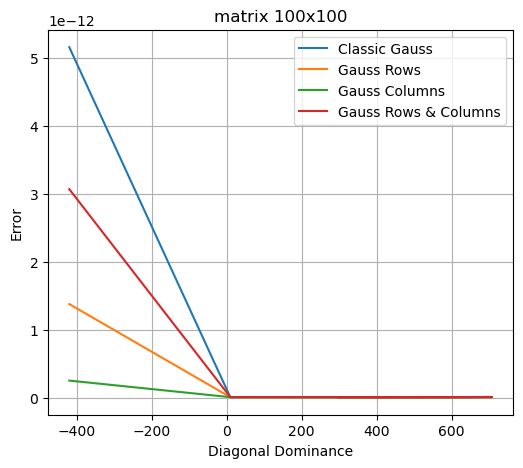

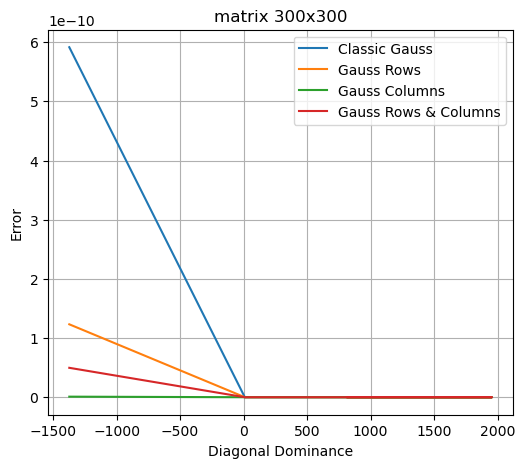

In [16]:
using PyPlot
coefs = [i*0.1 for i in -10:3:10]
println(coefs)

for d in [50,100,300]
    diag =Float64[]
    y_gauss = Float64[]
    y_gauss_row = Float64[]
    y_gauss_col = Float64[]
    y_gauss_row_col = Float64[]
    
    P = generate_matrix(-10, 10, d)

    for c in coefs
        A = copy(P)
        increase_diag_elems(P, c)
        x = ones(d)  # Генерация вектора x

        push!(diag, diag_dominance2(A))
        push!(y_gauss, test(gaussian_elimination, A, x)) 
        push!(y_gauss_row, test(gaussian_elimination_pivot_row, A, x))
        push!(y_gauss_col, test(gaussian_elimination_pivot, A, x))
        push!(y_gauss_row_col, test(gauss_with_rows_and_columns_permutation, A, x))
    end

    PyPlot.figure(figsize=(6, 5))
    PyPlot.plot(diag, y_gauss, label="Classic Gauss")
    PyPlot.plot(diag, y_gauss_row, label="Gauss Rows")
    PyPlot.plot(diag, y_gauss_col, label="Gauss Columns")
    PyPlot.plot(diag, y_gauss_row_col, label="Gauss Rows & Columns")
    PyPlot.title("matrix $(d)x$(d)")
    PyPlot.xlabel("Diagonal Dominance")
    PyPlot.ylabel("Error")
    PyPlot.legend()
    PyPlot.grid()
    PyPlot.show()
end